# Iris Dataset Classification - KNN and Decision Tree

This notebook demonstrates the basic application of two common machine learning algorithms for species classification using the classic Iris dataset.
- K-Nearest Neighbors (KNN)
- Decision Tree Classifier

This is a beginner-friendly guide for understanding and applying basic classification techniques in Python using scikit-learn.

## Libraries and Data import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Remove ID column
df=df.drop(columns=['Id'])

## Dataset Split

In [6]:
# Define Target, X and y
target_feature = "Species"
X = df.drop(columns=[target_feature])
y = df[target_feature]

In [7]:
# Split the data into training (70%) and test (30%) sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set number of rows: ",len(train_X))
print("Test Set number of rows: ",len(test_X))

Training Set number of rows:  105
Test Set number of rows:  45


## Iris Classification with KNN Model

The Step-by-Step of this section includes:
1. Fitting the KNN Model into training dataset.
2. Making predictions with the model using testing dataset.
3. Evaluating accuracy of the model predictions.
4. Visualising in dataframe format the predictions of each record, showing the probability percentage calculated of each record for each class.

In [8]:
# Generate and fit KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# Reset indexes
test_y = test_y.reset_index(drop=True)

In [10]:
# Predict classes using test data
knn_predictions = knn_model.predict(test_X)

In [11]:
# Evaluate accuracy of predictions
knn_accuracy = accuracy_score(test_y, knn_predictions)
print(f"Accuracy: {(knn_accuracy*100):.2f}%")

Accuracy: 100.00%


In [12]:
# Predict probabilities
probs = knn_model.predict_proba(test_X)

In [13]:
# Visualise probabilities of predictions for each class
predictions_df = pd.DataFrame(probs, columns=[f'Class {cls}' for cls in knn_model.classes_])
predictions_df['True Label'] = test_y
predictions_df['Predicted Label'] = knn_predictions

predictions_df

,Class Iris-setosa,Class Iris-versicolor,Class Iris-virginica,True Label,Predicted Label
0,0.0,1.000000,0.000000,Iris-versicolor,Iris-versicolor
1,1.0,0.000000,0.000000,Iris-setosa,Iris-setosa
2,0.0,0.000000,1.000000,Iris-virginica,Iris-virginica
3,0.0,1.000000,0.000000,Iris-versicolor,Iris-versicolor
4,0.0,1.000000,0.000000,Iris-versicolor,Iris-versicolor
5,1.0,0.000000,0.000000,Iris-setosa,Iris-setosa
6,0.0,1.000000,0.000000,Iris-versicolor,Iris-versicolor
7,0.0,0.000000,1.000000,Iris-virginica,Iris-virginica
8,0.0,0.666667,0.333333,Iris-versicolor,Iris-versicolor
9,0.0,1.000000,0.000000,Iris-versicolor,Iris-versicolor


## Iris Classification with Decision Tree

The Step-by-Step of this section includes:
1. Fitting the Decision Tree Model into training dataset.
2. Making predictions with the model using testing dataset.
3. Evaluating accuracy of the model predictions.
4. Visualising the decision tree created for prediction of the species.

In [14]:
# Generate and fit Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(train_X,train_y)

In [15]:
# Predict on test data
dt_predictions = dt_model.predict(test_X)

In [16]:
# Calculate accuracy of predictions
dt_accuracy = accuracy_score(test_y, dt_predictions)
print(f"Accuracy: {(dt_accuracy*100):.2f}%")

Accuracy: 100.00%


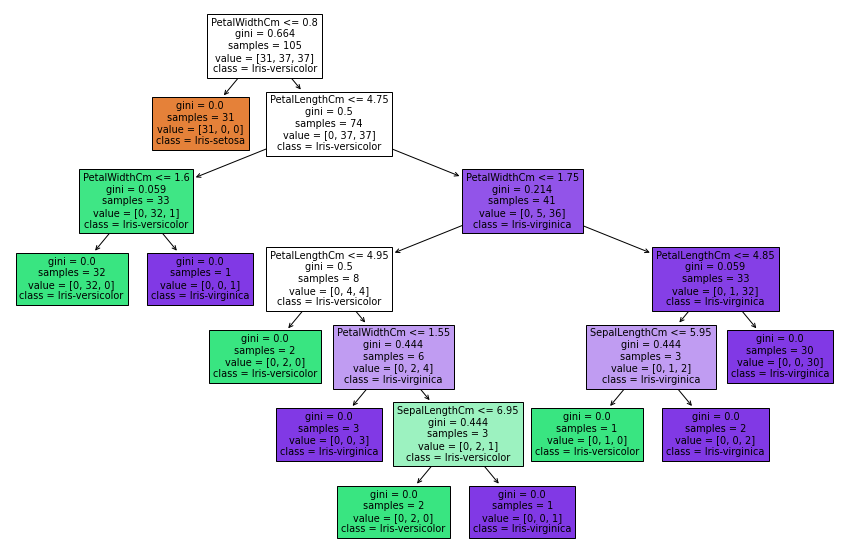

In [17]:
# Visualise decision tree
fig = plt.figure(figsize=(15,10))
_ = plot_tree(dt_model,
                   feature_names=test_X.columns,
                   class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                   filled=True)